In [1]:
import os
import numpy
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import vtkplotlib as vpl

import glob
import pprint
from tqdm import tqdm
from sklearn.utils import Bunch

from IPython import display
import ipywidgets as widgets

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')

import cv2 as cv

In [2]:
data_path_root = '../data/'

data_paths_deid = glob.glob(os.path.join(data_path_root, r'*_DeID'))
data_paths_deid = sorted(data_paths_deid)

print(data_paths_deid)
#jin_utils.print_paths(data_paths_deid)

data_paths_diorco = glob.glob(os.path.join(data_path_root, r'*_Diorco'))
data_paths_diorco = sorted(data_paths_diorco)

print(data_paths_diorco)
#jin_utils.print_paths(data_paths_diorco)

label_paths = glob.glob(os.path.join(data_path_root, '*_DeID/label*'))
label_paths = sorted(label_paths)

print(label_paths)
#jin_utils.print_paths(label_paths)

['../data/data_KNU_2020-08-14_DeID', '../data/data_KNU_2020-08-31_DeID', '../data/data_KNU_2020-09-10_DeID', '../data/data_KNU_2020-09-17_DeID', '../data/data_KNU_2020-09-27_DeID', '../data/data_KNU_2020-09-28_DeID']
['../data/data_KNU_2020-08-14_Diorco', '../data/data_KNU_2020-08-31_Diorco', '../data/data_KNU_2020-09-10_Diorco', '../data/data_KNU_2020-09-17_Diorco', '../data/data_KNU_2020-09-27_Diorco', '../data/data_KNU_2020-09-28_Diorco']
['../data/data_KNU_2020-08-14_DeID/label.xlsx', '../data/data_KNU_2020-08-31_DeID/label.xlsx', '../data/data_KNU_2020-09-10_DeID/label.xlsx', '../data/data_KNU_2020-09-17_DeID/label.xlsx', '../data/data_KNU_2020-09-27_DeID/label.xlsx', '../data/data_KNU_2020-09-28_DeID/label.xlsx']


In [3]:
data_paths_deid

['../data/data_KNU_2020-08-14_DeID',
 '../data/data_KNU_2020-08-31_DeID',
 '../data/data_KNU_2020-09-10_DeID',
 '../data/data_KNU_2020-09-17_DeID',
 '../data/data_KNU_2020-09-27_DeID',
 '../data/data_KNU_2020-09-28_DeID']

In [4]:
data_paths_diorco

['../data/data_KNU_2020-08-14_Diorco',
 '../data/data_KNU_2020-08-31_Diorco',
 '../data/data_KNU_2020-09-10_Diorco',
 '../data/data_KNU_2020-09-17_Diorco',
 '../data/data_KNU_2020-09-27_Diorco',
 '../data/data_KNU_2020-09-28_Diorco']

In [5]:
label_paths

['../data/data_KNU_2020-08-14_DeID/label.xlsx',
 '../data/data_KNU_2020-08-31_DeID/label.xlsx',
 '../data/data_KNU_2020-09-10_DeID/label.xlsx',
 '../data/data_KNU_2020-09-17_DeID/label.xlsx',
 '../data/data_KNU_2020-09-27_DeID/label.xlsx',
 '../data/data_KNU_2020-09-28_DeID/label.xlsx']

In [6]:
img_paths_list = []
stl_paths_list = [] 
for data_path_diorco in data_paths_deid:
    img_paths = glob.glob(os.path.join(data_path_diorco, r'QH*'))
#     img_paths = sorted(img_paths)
    
#     print(len(img_paths))
    img_paths_list.extend(img_paths)
for stl_path in img_paths_list : 
    stl_paths = glob.glob(os.path.join(stl_path,'Files',r'*SO.stl'))
#     print(stl_paths)
    stl_paths_list.extend(stl_paths)
    

In [7]:
len(stl_paths_list)

963

In [8]:
stl_paths_list

['../data/data_KNU_2020-08-14_DeID/QH0399/Files/QH0399_01A1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0399/Files/QH0399_02B1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0492/Files/QH0492_01A1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0492/Files/QH0492_02B1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0093/Files/QH0093_02B1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0280/Files/QH0280_01A1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0280/Files/QH0280_02B1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0380/Files/QH0380_02B1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0380/Files/QH0380_01A1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0419/Files/QH0419_01A1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0419/Files/QH0419_02B1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0392/Files/QH0392_02B1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0412/Files/QH0412_01A1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0412/Files/QH0412_02B1SO.stl',
 '../data/data_KNU_2020-08-14_DeID/QH0394/Files/

In [9]:
i=0

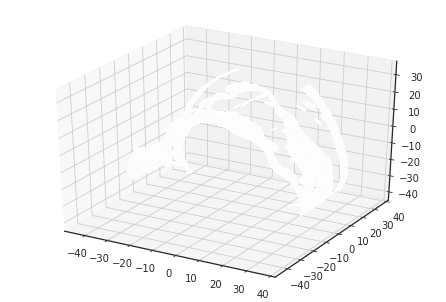

In [10]:

# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL file and add the vectors to the plot
stl_mesh = mesh.Mesh.from_file(stl_paths_list[i])
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(stl_mesh.vectors))

# Auto scale to the mesh size
scale = stl_mesh.points.flatten('C')
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()

In [11]:
output_path = os.path.splitext(os.path.basename(stl_paths_list[i]))[0] + r'_right.png'
output_path

'QH0399_01A1SO_right.png'

In [ ]:
i=0
stl_mesh = mesh.Mesh.from_file(stl_paths_list[i])

# Plot the mesh
vpl.mesh_plot(stl_mesh)

vpl.view(focal_point=(0.0, 0.0, 0.0), camera_position=(-1.0, 0.0, 0.0), camera_direction=None, up_view=(0.0, 1.0, 0.0))
vpl.reset_camera()

# Show the figure
# vpl.show()
output_path = os.path.join('./stl_jpg/',os.path.splitext(os.path.basename(stl_paths_list[i]))[0] + r'_right.png')
vpl.save_fig(output_path, pixels=(900, 900), off_screen=True)

In [ ]:
vpl.view(focal_point=(0.0, 0.0, 0.0), camera_position=(1.0, 0.0, 0.0), camera_direction=None, up_view=(0.0, 1.0, 0.0))
vpl.reset_camera()
output_path = os.path.join('./stl_jpg/',os.path.splitext(os.path.basename(stl_paths_list[i]))[0] + r'_left.png')
vpl.save_fig(output_path, pixels=(900, 900), off_screen=True)

In [ ]:
i=3
stl_mesh = mesh.Mesh.from_file(stl_paths_list[i])

# Plot the mesh
vpl.mesh_plot(stl_mesh)

vpl.view(focal_point=(0.0, 0.0, 0.0), camera_position=(-1.0, 0.0, 0.0), camera_direction=None, up_view=(0.0, 1.0, 0.0))
vpl.reset_camera()

# Show the figure
# vpl.show()
output_path = os.path.join('./stl_jpg/',os.path.splitext(os.path.basename(stl_paths_list[i]))[0] + r'_right.png')
vpl.save_fig(output_path, pixels=(900, 900), off_screen=True)





vpl.view(focal_point=(0.0, 0.0, 0.0), camera_position=(1.0, 0.0, 0.0), camera_direction=None, up_view=(0.0, 1.0, 0.0))
vpl.reset_camera()
output_path = os.path.join('./stl_jpg/',os.path.splitext(os.path.basename(stl_paths_list[i]))[0] + r'_left.png')
vpl.save_fig(output_path, pixels=(900, 900), off_screen=True)

In [16]:
for i in range(len(stl_paths_list)):
# Load the STL file
    stl_mesh = mesh.Mesh.from_file(stl_paths_list[i])

    # Plot the mesh
    vpl.mesh_plot(stl_mesh)

    vpl.view(focal_point=(0.0, 0.0, 0.0), camera_position=(-1.0, 0.0, 0.0), camera_direction=None, up_view=(0.0, 1.0, 0.0))
    vpl.reset_camera()

    # Show the figure
    # vpl.show()
    output_path = os.path.join('./stl_jpg/',os.path.splitext(os.path.basename(stl_paths_list[i]))[0] + r'_right.png')
    vpl.save_fig(output_path, pixels=(900, 900), off_screen=True)





    vpl.view(focal_point=(0.0, 0.0, 0.0), camera_position=(1.0, 0.0, 0.0), camera_direction=None, up_view=(0.0, 1.0, 0.0))
    vpl.reset_camera()
    output_path = os.path.join('./stl_jpg/',os.path.splitext(os.path.basename(stl_paths_list[i]))[0] + r'_left.png')
    vpl.save_fig(output_path, pixels=(900, 900), off_screen=True)

AssertionError: File too large, got 2009002018 triangles which exceeds the maximum of 100000000

In [ ]:
# Load the STL file
stl_mesh = mesh.Mesh.from_file(stl_paths_list[i])

# Plot the mesh
vpl.mesh_plot(stl_mesh)

# Set Camera position/orientation
vpl.view(focal_point=(0.0, 0.0, 0.0), camera_position=(-1.0, 0.0, 0.0), camera_direction=None, up_view=(0.0, 1.0, 0.0))
vpl.reset_camera()

# Show the figure
vpl.show()

# Save the figure
output_path = os.path.splitext(os.path.basename(stl_path))[0] + r'_right.png'
# vpl.save_fig(output_path, pixels=(900, 900), off_screen=True)

# Set Camera position/orientation
vpl.view(focal_point=(0.0, 0.0, 0.0), camera_position=(1.0, 0.0, 0.0), camera_direction=None, up_view=(0.0, 1.0, 0.0))
vpl.reset_camera()

# Show the figure
# vpl.show()

# Save the figure
output_path = os.path.splitext(os.path.basename(stl_path))[0] + r'_left.png'
# vpl.save_fig(output_path, pixels=(900, 900), off_screen=True)